In [ ]:
!pip install wordcloud
!pip install imblearn
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install scipy
!pip install statsmodels
!pip install openpyxl
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi

from sklearn.impute import KNNImputer #imputasi
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics #scaling
from imblearn.over_sampling import SMOTE #oversampling
from wordcloud import WordCloud #visualisasi ka
from scipy.stats import shapiro

import statsmodels
import statsmodels.api as sm

In [ ]:
warmindo = pd.read_csv ("Penjualan warmindo.csv")
warmindo

,id,invoice_id,tanggal_transaksi,customer_id,nama_produk,jenis_produk,kategori_produk,quantity,harga_jual,jenis_pembayaran,jenis_pesanan,nilai_penjualan
0,1,1,4/11/22,44,Indomie Ayam Spesial,mie-kuah,makanan,2,9000,QRIS-OVO,Dine-In,18000
1,2,2,8/1/22,10,Indomie Ayam Spesial,mie-kuah,makanan,2,9000,CASH,Delivery,18000
2,3,3,4/3/22,62,Indomie Rasa Soto Betawi,mie-kuah,makanan,1,10000,QRIS-OTHERS,Delivery,10000
3,4,4,3/19/22,48,Indomie Rasa Soto Padang,mie-kuah,makanan,3,10000,CASH,Dine-In,30000
4,5,5,4/29/22,87,Indomie Rasa Sop Buntut,mie-kuah,makanan,2,10000,QRIS-OVO,Dine-In,20000
...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,495,5/17/22,11,Indomie Baso Sapi,mie-kuah,makanan,1,9000,CASH,Delivery,9000
495,496,496,6/6/22,55,Indomie Goreng Spesial,mie-goreng,makanan,1,9000,QRIS-GOPAY,Delivery,9000
496,497,497,7/14/22,25,Indomie Goreng Rendang,mie-goreng,makanan,2,9000,QRIS-GOPAY,Delivery,18000
497,498,498,8/22/22,39,Indomie Goreng Pedas,mie-goreng,makanan,2,9000,QRIS-DANA,Delivery,18000


In [ ]:
# menampilkan 5 data pertam/teratas
warmindo.head()

,id,invoice_id,tanggal_transaksi,customer_id,nama_produk,jenis_produk,kategori_produk,quantity,harga_jual,jenis_pembayaran,jenis_pesanan,nilai_penjualan
0,1,1,4/11/22,44,Indomie Ayam Spesial,mie-kuah,makanan,2,9000,QRIS-OVO,Dine-In,18000
1,2,2,8/1/22,10,Indomie Ayam Spesial,mie-kuah,makanan,2,9000,CASH,Delivery,18000
2,3,3,4/3/22,62,Indomie Rasa Soto Betawi,mie-kuah,makanan,1,10000,QRIS-OTHERS,Delivery,10000
3,4,4,3/19/22,48,Indomie Rasa Soto Padang,mie-kuah,makanan,3,10000,CASH,Dine-In,30000
4,5,5,4/29/22,87,Indomie Rasa Sop Buntut,mie-kuah,makanan,2,10000,QRIS-OVO,Dine-In,20000


In [ ]:
warmindo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 499 non-null    int64 
 1   invoice_id         499 non-null    int64 
 2   tanggal_transaksi  499 non-null    object
 3   customer_id        499 non-null    int64 
 4   nama_produk        499 non-null    object
 5   jenis_produk       499 non-null    object
 6   kategori_produk    499 non-null    object
 7   quantity           499 non-null    int64 
 8   harga_jual         499 non-null    int64 
 9   jenis_pembayaran   499 non-null    object
 10  jenis_pesanan      499 non-null    object
 11  nilai_penjualan    499 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 46.9+ KB


In [ ]:
warmindo.describe().T

,count,mean,std,min,25%,50%,75%,max
id,499.0,250.000000,144.193157,1.0,125.5,250.0,374.5,499.0
invoice_id,499.0,250.000000,144.193157,1.0,125.5,250.0,374.5,499.0
customer_id,499.0,48.016032,28.521811,1.0,22.0,48.0,72.5,100.0
quantity,499.0,1.953908,0.796503,1.0,1.0,2.0,3.0,3.0
harga_jual,499.0,9438.877756,496.748002,9000.0,9000.0,9000.0,10000.0,10000.0
nilai_penjualan,499.0,18440.881764,7575.722958,9000.0,10000.0,18000.0,27000.0,30000.0


In [ ]:
warmindo.isna()

,id,invoice_id,tanggal_transaksi,customer_id,nama_produk,jenis_produk,kategori_produk,quantity,harga_jual,jenis_pembayaran,jenis_pesanan,nilai_penjualan
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
494,False,False,False,False,False,False,False,False,False,False,False,False
495,False,False,False,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
warmindo.isna().sum()

id                   0
invoice_id           0
tanggal_transaksi    0
customer_id          0
nama_produk          0
jenis_produk         0
kategori_produk      0
quantity             0
harga_jual           0
jenis_pembayaran     0
jenis_pesanan        0
nilai_penjualan      0
dtype: int64

In [ ]:
# melihat ukuran data (baris,kolom)
warmindo.shape

(499, 12)

In [ ]:
# mengecek typpe data
warmindo.dtypes

id                    int64
invoice_id            int64
tanggal_transaksi    object
customer_id           int64
nama_produk          object
jenis_produk         object
kategori_produk      object
quantity              int64
harga_jual            int64
jenis_pembayaran     object
jenis_pesanan        object
nilai_penjualan       int64
dtype: object

In [ ]:
warmindo.duplicated().sum()

np.int64(0)

In [ ]:
print(warmindo['jenis_pembayaran'].unique())

['QRIS-OVO' 'CASH' 'QRIS-OTHERS' 'QRIS-DANA' 'QRIS-GOPAY' 'QRIS-SHOPEEPAY']


In [ ]:
warmindo['jenis_pembayaran'] = warmindo['jenis_pembayaran'].map({'QRIS-OVO': 0, 'CASH': 1, 'QRIS-OTHERS': 2, 'QRIS-DANA': 3, 'QRIS-GOPAY': 4, 'QRIS-SHOPEEPAY': 5})
warmindo

,id,invoice_id,tanggal_transaksi,customer_id,nama_produk,jenis_produk,kategori_produk,quantity,harga_jual,jenis_pembayaran,jenis_pesanan,nilai_penjualan
0,1,1,4/11/22,44,Indomie Ayam Spesial,mie-kuah,makanan,2,9000,0,Dine-In,18000
1,2,2,8/1/22,10,Indomie Ayam Spesial,mie-kuah,makanan,2,9000,1,Delivery,18000
2,3,3,4/3/22,62,Indomie Rasa Soto Betawi,mie-kuah,makanan,1,10000,2,Delivery,10000
3,4,4,3/19/22,48,Indomie Rasa Soto Padang,mie-kuah,makanan,3,10000,1,Dine-In,30000
4,5,5,4/29/22,87,Indomie Rasa Sop Buntut,mie-kuah,makanan,2,10000,0,Dine-In,20000
...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,495,5/17/22,11,Indomie Baso Sapi,mie-kuah,makanan,1,9000,1,Delivery,9000
495,496,496,6/6/22,55,Indomie Goreng Spesial,mie-goreng,makanan,1,9000,4,Delivery,9000
496,497,497,7/14/22,25,Indomie Goreng Rendang,mie-goreng,makanan,2,9000,4,Delivery,18000
497,498,498,8/22/22,39,Indomie Goreng Pedas,mie-goreng,makanan,2,9000,3,Delivery,18000


In [ ]:
warmindo.duplicated().sum()

np.int64(0)

In [ ]:
# nampilin kolom
warmindo.columns

Index(['id', 'invoice_id', 'tanggal_transaksi', 'customer_id', 'nama_produk',
       'jenis_produk', 'kategori_produk', 'quantity', 'harga_jual',
       'jenis_pembayaran', 'jenis_pesanan', 'nilai_penjualan'],
      dtype='object')

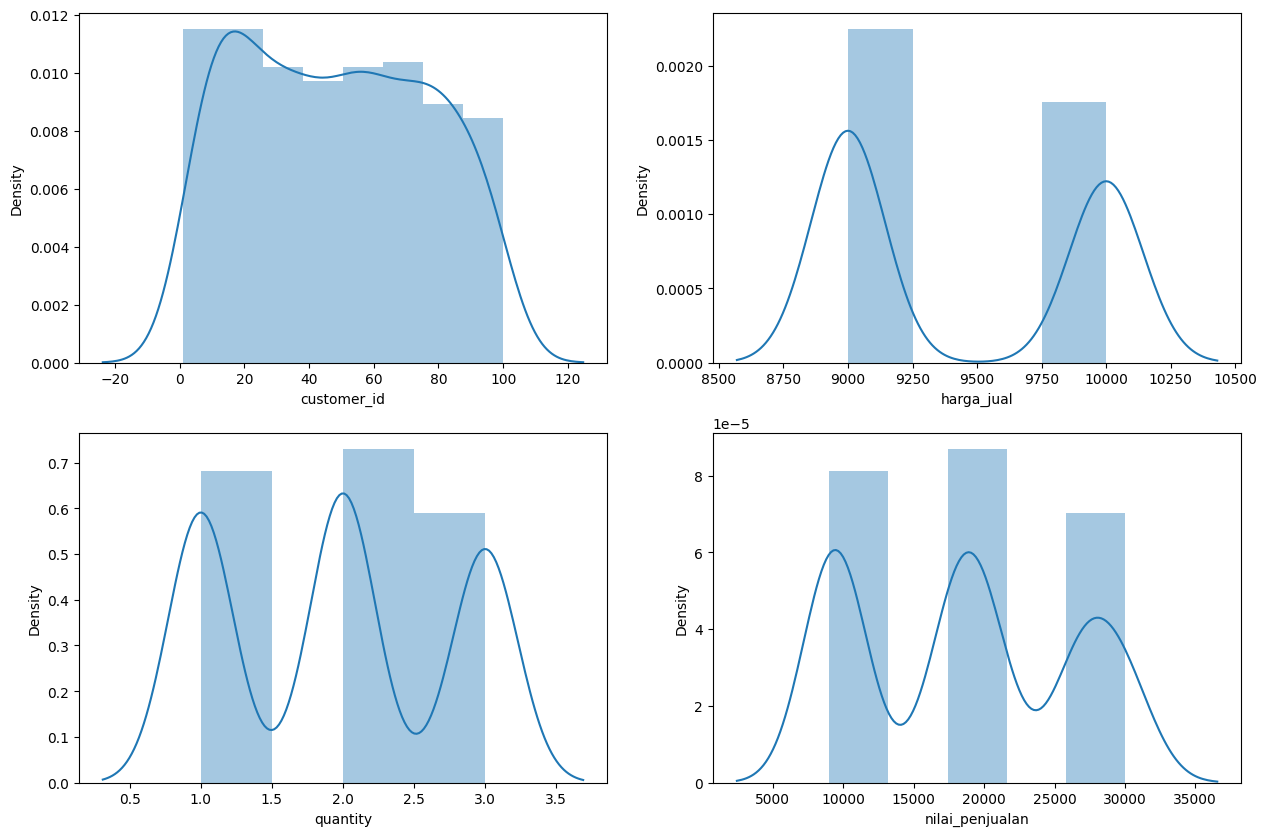

In [ ]:
# Cek normalitas data dengan histogram
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.distplot(warmindo["customer_id"], ax=axes[0, 0])
sns.distplot(warmindo["harga_jual"], ax=axes[0, 1])
sns.distplot(warmindo["quantity"], ax=axes[1, 0])
sns.distplot(warmindo["nilai_penjualan"], ax=axes[1, 1])
plt.show()

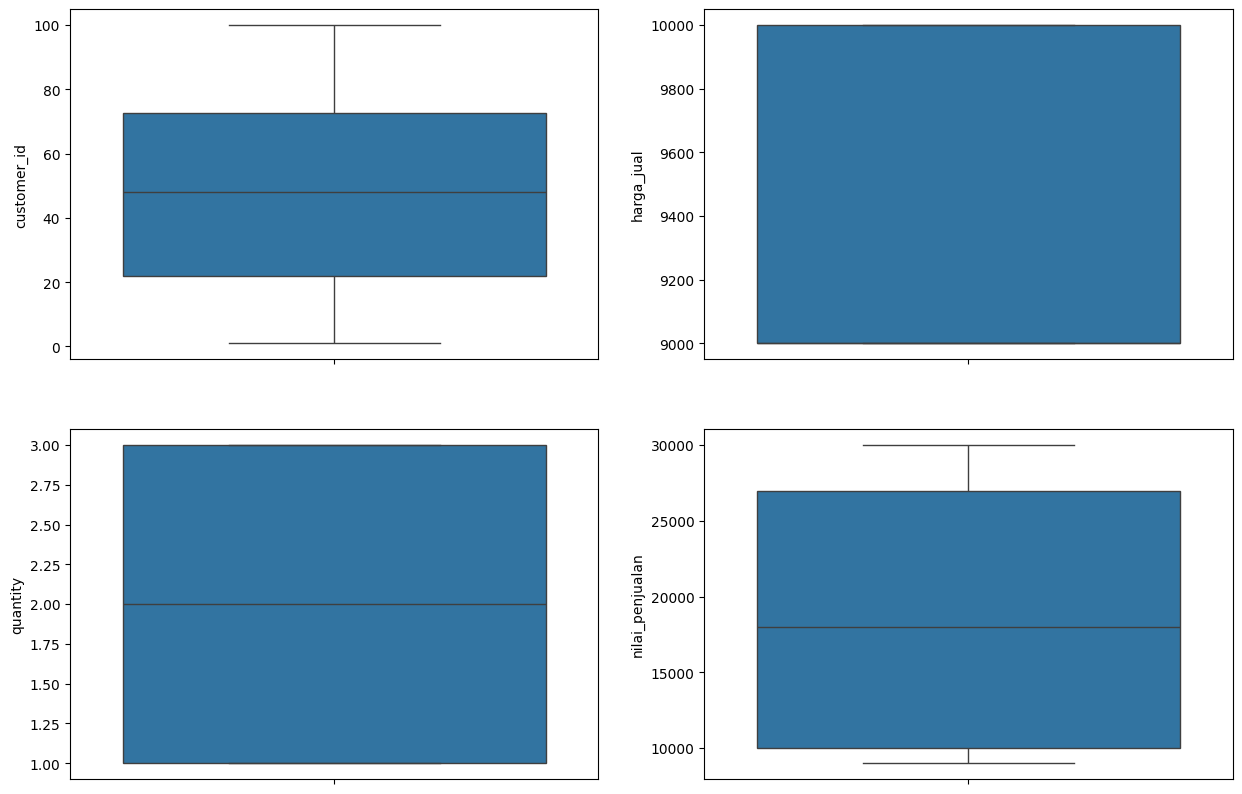

In [ ]:
# Cek normalitas data dengan boxplot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(warmindo["customer_id"], ax=axes[0, 0])
sns.boxplot(warmindo["harga_jual"], ax=axes[0, 1])
sns.boxplot(warmindo["quantity"], ax=axes[1, 0])
sns.boxplot(warmindo["nilai_penjualan"], ax=axes[1, 1])
plt.show()

In [ ]:
# Menangani nilai kosong dengan drop atau imputasi
warmindo = warmindo.dropna(subset=['invoice_id', 'id', 'customer_id', 'harga_jual', 'quantity', 'nilai_penjualan'])

# Memastikan kolom-kolom relevan adalah numerik
numerik_kolom = ['invoice_id', 'id', 'customer_id', 'harga_jual', 'quantity', 'nilai_penjualan']
for kolom in numerik_kolom:
    if not np.issubdtype(warmindo[kolom].dtype, np.number):
        warmindo[kolom] = pd.to_numeric(warmindo[kolom], errors='coerce')


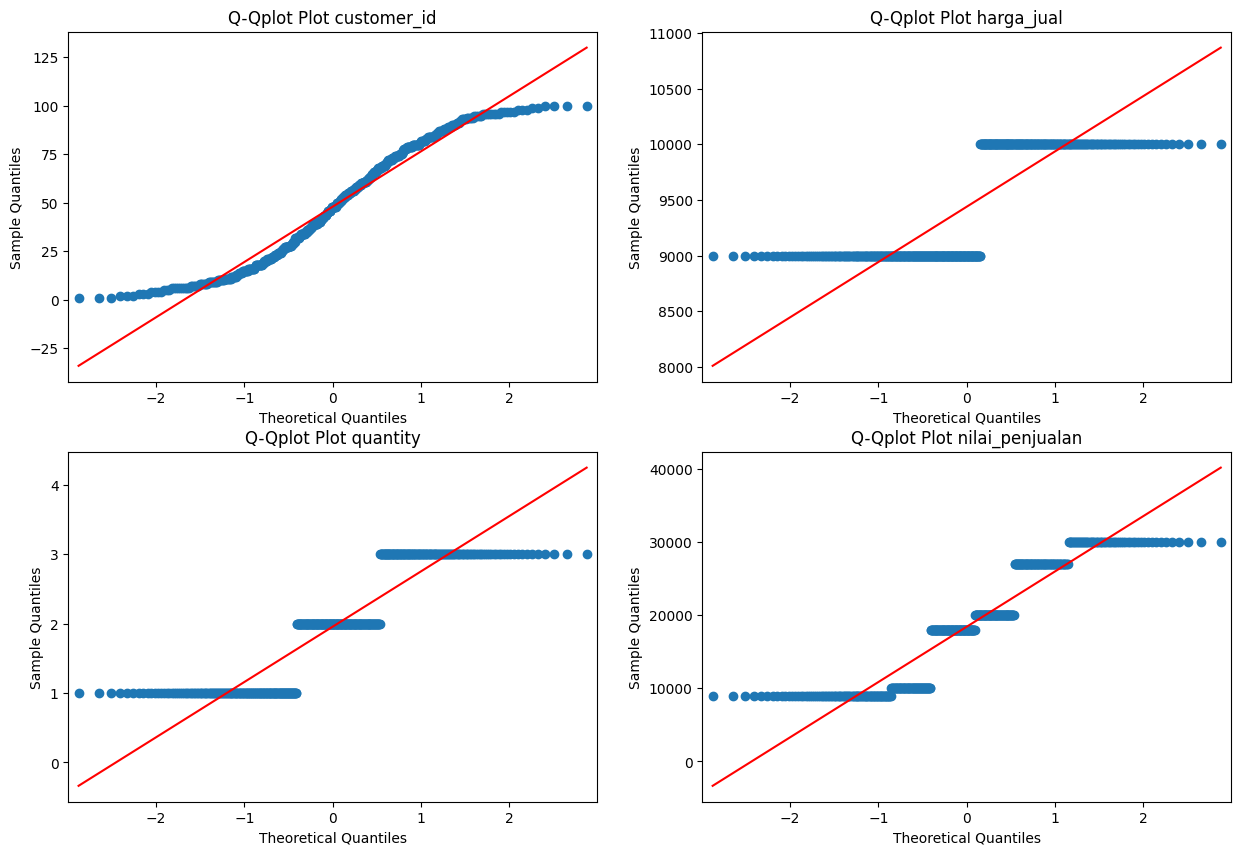

In [ ]:
# Cek normalitas data dengan Q-Q plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sm.graphics.qqplot(warmindo["customer_id"].dropna(), line='s', ax=axes[0, 0])
axes[0, 0].title.set_text('Q-Qplot Plot customer_id')

sm.graphics.qqplot(warmindo["harga_jual"].dropna(), line='s', ax=axes[0, 1])
axes[0, 1].title.set_text('Q-Qplot Plot harga_jual')

sm.graphics.qqplot(warmindo["quantity"].dropna(), line='s', ax=axes[1, 0])
axes[1, 0].title.set_text('Q-Qplot Plot quantity')

sm.graphics.qqplot(warmindo["nilai_penjualan"].dropna(), line='s', ax=axes[1, 1])
axes[1, 1].title.set_text('Q-Qplot Plot nilai_penjualan')

plt.show()

In [ ]:
# Cek Normalitas dengan Uji Shapiro-Wilk
column = warmindo.columns

for i in column:
  stat, p = shapiro(warmindo[i])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # Pengujian Hipotesis
  alpha = 0.05
  if p > alpha:
    print('Gagal Tolak H0, {} berdistribusi normal'.format(i))
  else:
    print('Tolak H0, {} tidak berdistribusi normal'.format(i))

Statistics=0.955, p=0.000
Tolak H0, id tidak berdistribusi normal
Statistics=0.955, p=0.000
Tolak H0, invoice_id tidak berdistribusi normal
Statistics=0.956, p=0.000
Tolak H0, tanggal_transaksi tidak berdistribusi normal
Statistics=0.951, p=0.000
Tolak H0, customer_id tidak berdistribusi normal
Statistics=0.952, p=0.000
Tolak H0, nama_produk tidak berdistribusi normal
Statistics=0.576, p=0.000
Tolak H0, jenis_produk tidak berdistribusi normal
Statistics=1.000, p=1.000
Gagal Tolak H0, kategori_produk berdistribusi normal
Statistics=0.799, p=0.000
Tolak H0, quantity tidak berdistribusi normal
Statistics=0.631, p=0.000
Tolak H0, harga_jual tidak berdistribusi normal
Statistics=0.906, p=0.000
Tolak H0, jenis_pembayaran tidak berdistribusi normal
Statistics=0.636, p=0.000
Tolak H0, jenis_pesanan tidak berdistribusi normal
Statistics=0.863, p=0.000
Tolak H0, nilai_penjualan tidak berdistribusi normal


In [ ]:
# Mengabaikan peringatan
warnings.filterwarnings('ignore')

# Contoh: Dataframe 'warmindo' yang diimpor (sesuaikan dengan data yang sebenarnya)
# warmindo = pd.read_csv('path_to_your_data.csv')

# Uji normalitas menggunakan uji Shapiro-Wilk
columns_to_test = ['id', 'invoice_id', 'customer_id', 'harga_jual', 'quantity', 'nilai_penjualan']

for col in columns_to_test:
    stat, p = shapiro(warmindo[col].dropna())
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Gagal Tolak H0, {} berdistribusi normal'.format(col))
    else:
        print('Tolak H0, {} tidak berdistribusi normal'.format(col))


Statistics=0.955, p=0.000
Tolak H0, id tidak berdistribusi normal
Statistics=0.955, p=0.000
Tolak H0, invoice_id tidak berdistribusi normal
Statistics=0.951, p=0.000
Tolak H0, customer_id tidak berdistribusi normal
Statistics=0.631, p=0.000
Tolak H0, harga_jual tidak berdistribusi normal
Statistics=0.799, p=0.000
Tolak H0, quantity tidak berdistribusi normal
Statistics=0.863, p=0.000
Tolak H0, nilai_penjualan tidak berdistribusi normal


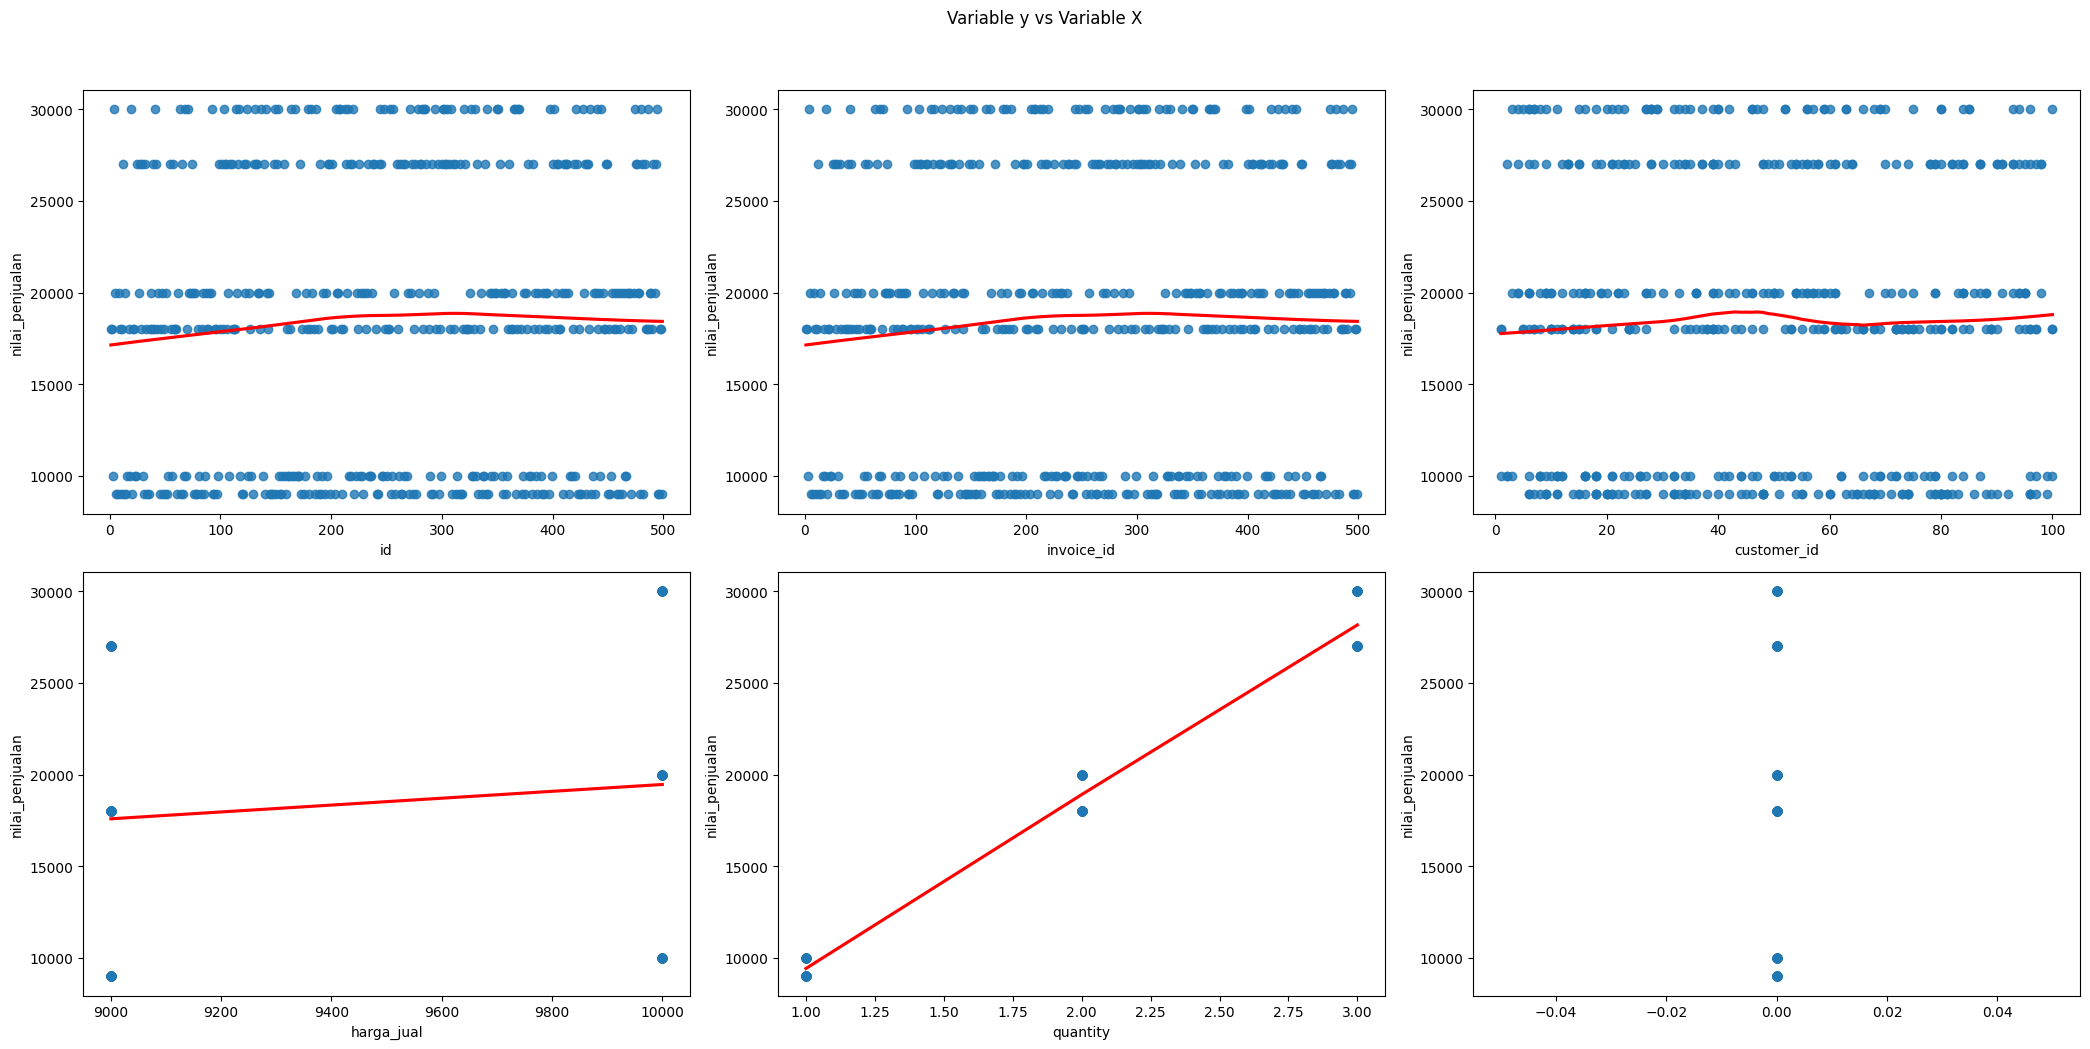

In [ ]:
# Membuat plot regresi untuk beberapa variabel
fig, axes = plt.subplots(2, 3, figsize=(21, 11))
fig.suptitle('Variable y vs Variable X')

# Plot regresi antara berbagai kolom dalam warmindo dengan nilai_penjualan
sns.regplot(x=warmindo["id"], y=warmindo["nilai_penjualan"], lowess=True, line_kws={'color': 'red'}, ax=axes[0, 0])
sns.regplot(x=warmindo["invoice_id"], y=warmindo["nilai_penjualan"], lowess=True, line_kws={'color': 'red'}, ax=axes[0, 1])
sns.regplot(x=warmindo["customer_id"], y=warmindo["nilai_penjualan"], lowess=True, line_kws={'color': 'red'}, ax=axes[0, 2])
sns.regplot(x=warmindo["harga_jual"], y=warmindo["nilai_penjualan"], lowess=True, line_kws={'color': 'red'}, ax=axes[1, 0])
sns.regplot(x=warmindo["quantity"], y=warmindo["nilai_penjualan"], lowess=True, line_kws={'color': 'red'}, ax=axes[1, 1])

# Mengonversi kategori produk menjadi angka menggunakan .astype('category').cat.codes
sns.regplot(x=warmindo["kategori_produk"].astype('category').cat.codes, y=warmindo["nilai_penjualan"], lowess=True, line_kws={'color': 'red'}, ax=axes[1, 2])

# Menyesuaikan layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
numerik = warmindo.select_dtypes(include=['object']).columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for i in numerik:
  warmindo[i] = encoder.fit_transform(warmindo[i])

In [ ]:
# mengecek typpe data
warmindo.dtypes

id                   int64
invoice_id           int64
tanggal_transaksi    int64
customer_id          int64
nama_produk          int64
jenis_produk         int64
kategori_produk      int64
quantity             int64
harga_jual           int64
jenis_pembayaran     int64
jenis_pesanan        int64
nilai_penjualan      int64
dtype: object

<Axes: >

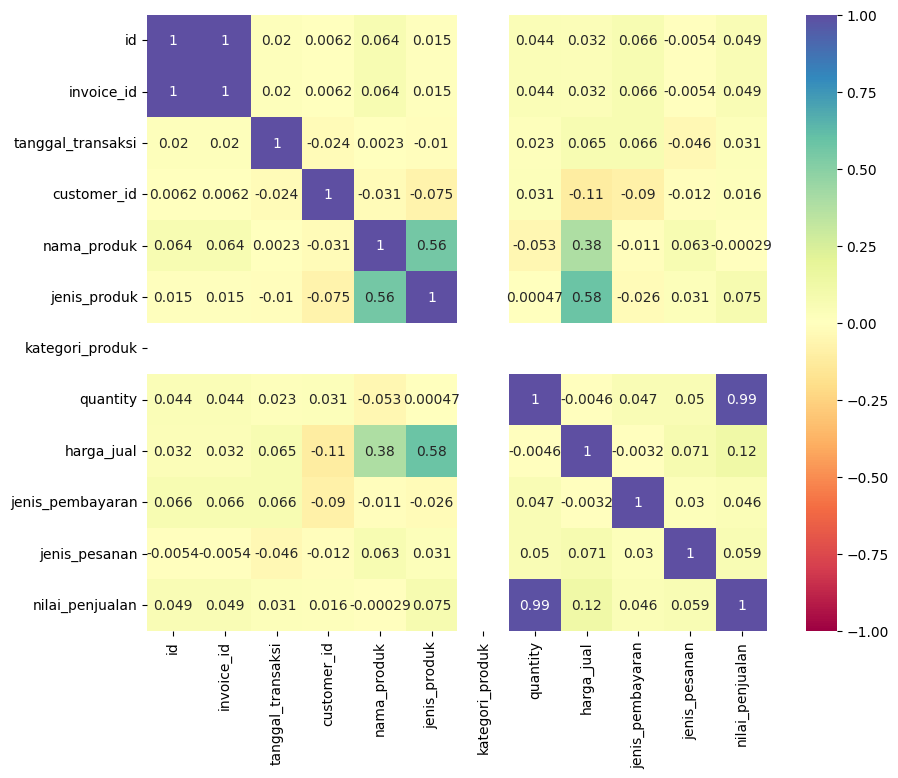

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(warmindo.corr(), vmax=1, vmin=-1, center=0, cmap="Spectral", annot=True)

In [ ]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = warmindo.corr()["nilai_penjualan"].sort_values()
korelasi

nama_produk         -0.000294
customer_id          0.016110
tanggal_transaksi    0.031151
jenis_pembayaran     0.046017
id                   0.048884
invoice_id           0.048884
jenis_pesanan        0.058953
jenis_produk         0.074574
harga_jual           0.123499
quantity             0.990404
nilai_penjualan      1.000000
kategori_produk           NaN
Name: nilai_penjualan, dtype: float64

In [ ]:
# Scale data
scaler = StandardScaler()
scaled_warmindo = scaler.fit_transform(warmindo)
scaled_warmindo

array([[-1.72858323, -1.72858323, -0.41725111, ..., -1.40701762,
         0.9664929 , -0.05825506],
       [-1.72164113, -1.72164113,  1.34751929, ..., -0.81251991,
        -1.03466875, -0.05825506],
       [-1.71469903, -1.71469903, -0.15772605, ..., -0.21802221,
        -1.03466875, -1.1153196 ],
       ...,
       [ 1.71469903,  1.71469903,  0.9322792 , ...,  0.97097321,
        -1.03466875, -0.05825506],
       [ 1.72164113,  1.72164113,  1.55513934, ...,  0.3764755 ,
        -1.03466875, -0.05825506],
       [ 1.72858323,  1.72858323,  0.60354746, ..., -1.40701762,
         0.9664929 , -1.24745267]])

In [ ]:
# Membuat dataframe dari hasil scalling
scaled_warmindo = pd.DataFrame(warmindo, columns=warmindo.columns)
scaled_warmindo

,id,invoice_id,tanggal_transaksi,customer_id,nama_produk,jenis_produk,kategori_produk,quantity,harga_jual,jenis_pembayaran,jenis_pesanan,nilai_penjualan
0,1,1,79,44,0,1,0,2,9000,0,1,18000
1,2,2,181,10,0,1,0,2,9000,1,0,18000
2,3,3,94,62,12,1,0,1,10000,2,0,10000
3,4,4,58,48,14,1,0,3,10000,1,1,30000
4,5,5,93,87,10,1,0,2,10000,0,1,20000
...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,495,107,11,1,1,0,1,9000,1,0,9000
495,496,496,148,55,7,0,0,1,9000,4,0,9000
496,497,497,157,25,5,0,0,2,9000,4,0,18000
497,498,498,193,39,4,0,0,2,9000,3,0,18000


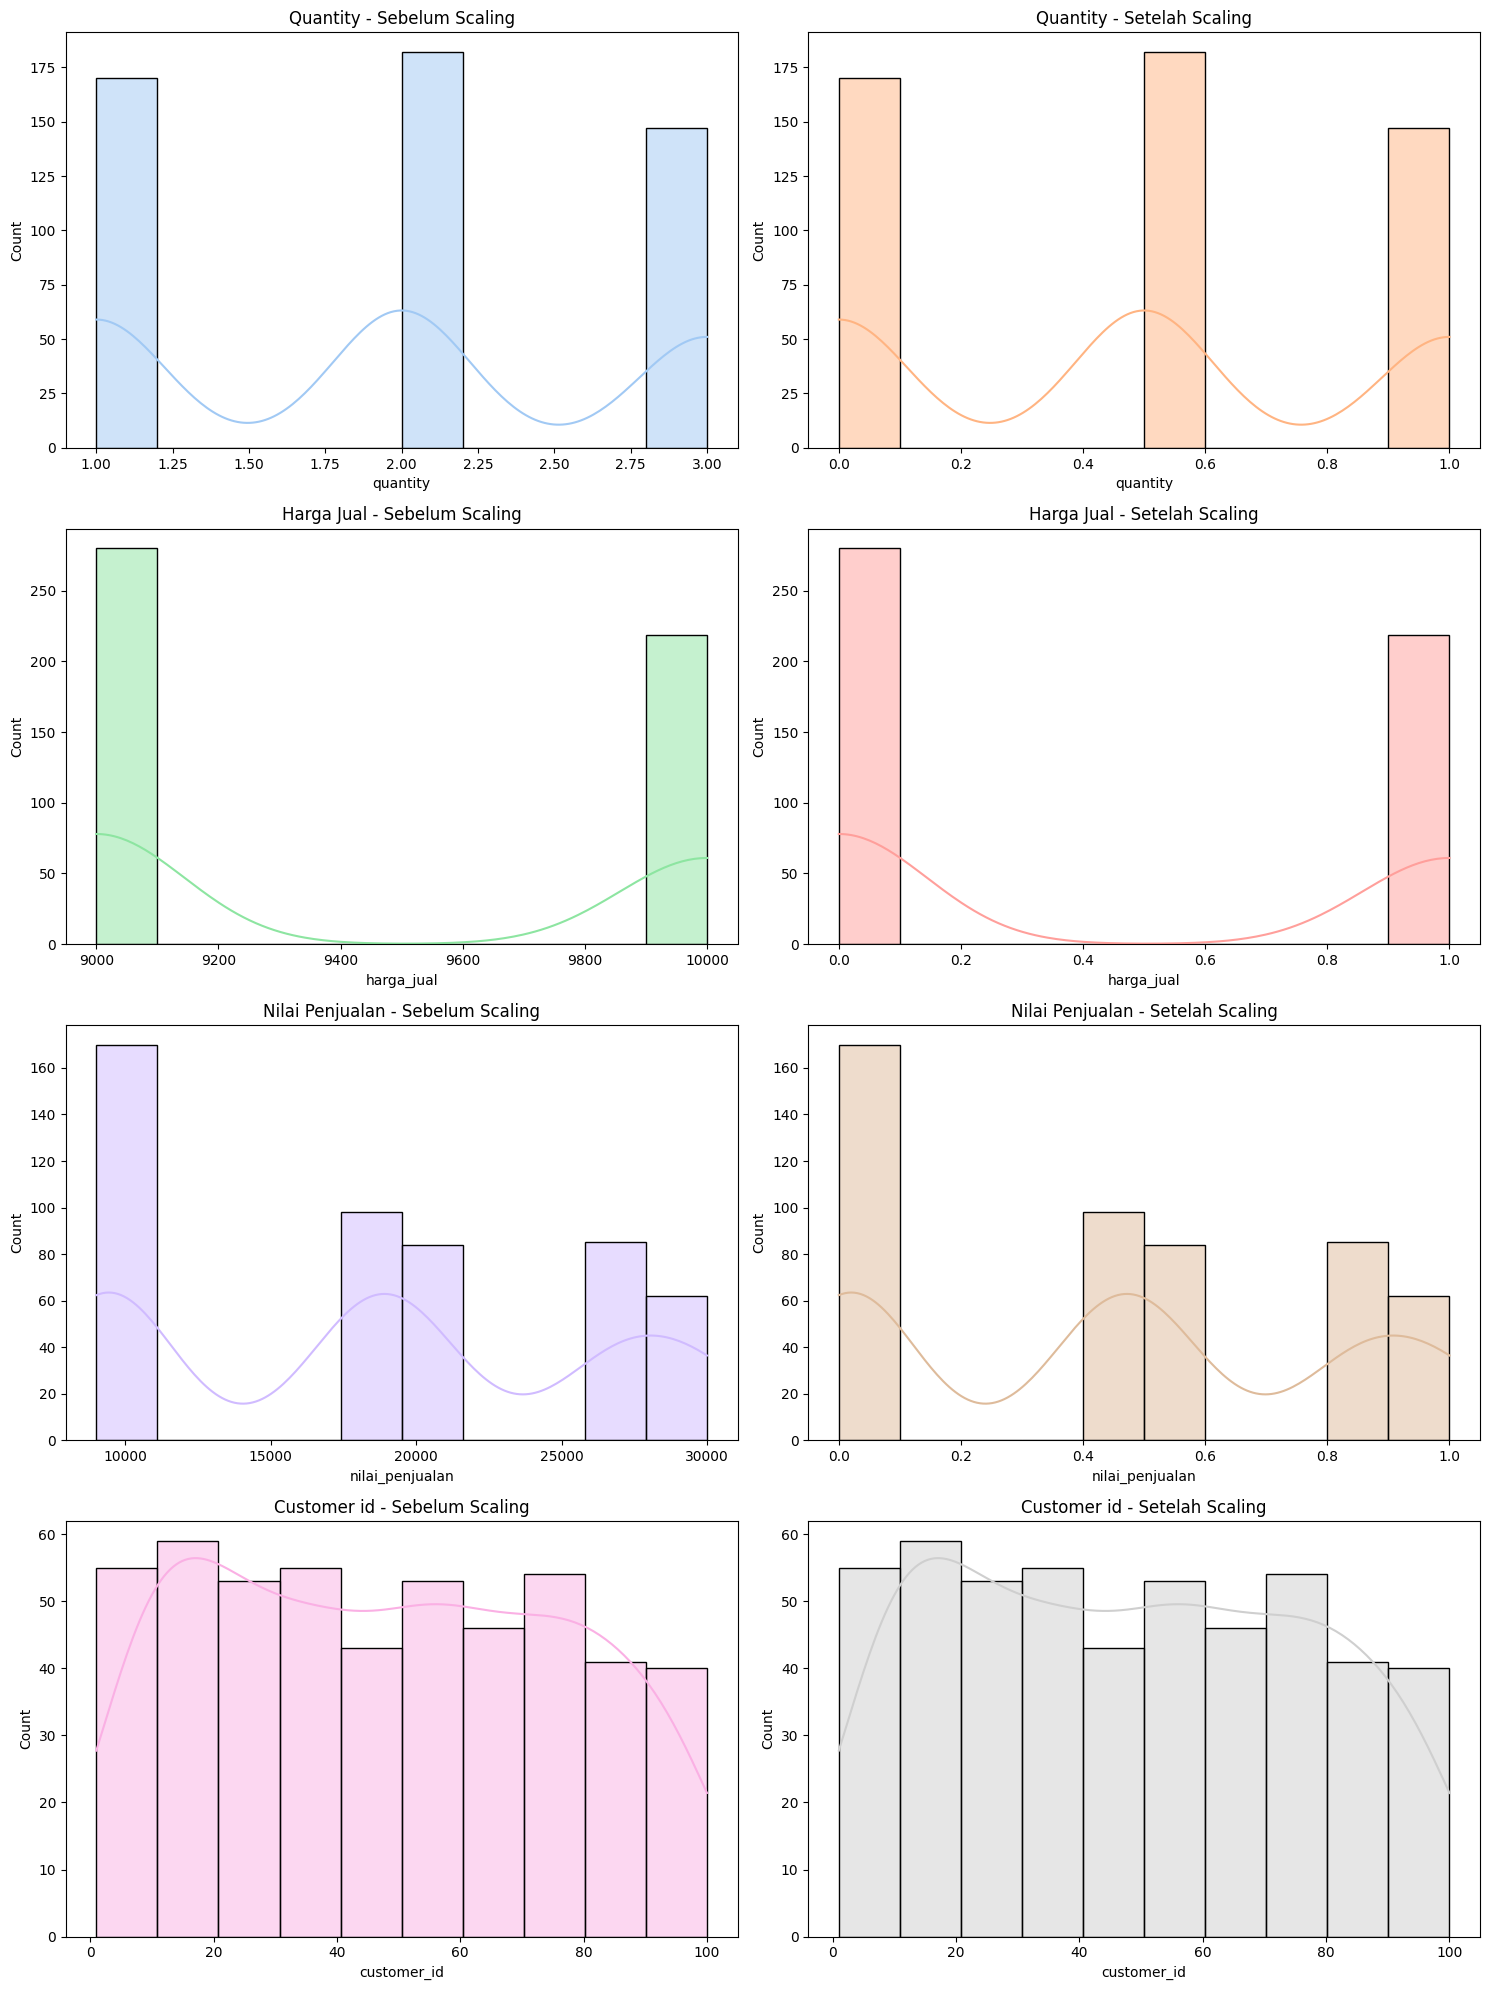

In [ ]:
# Tentukan palet warna pastel
warna_pastel = sns.color_palette("pastel")

# Buat subplots dengan 4 baris dan 2 kolom (untuk data asli dan setelah scaling)
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

# Plot untuk Quantity
sns.histplot(warmindo['quantity'], kde=True, ax=axes[0, 0], color=warna_pastel[0], label='Sebelum Scaling')
sns.histplot(scaled_warmindo['quantity'], kde=True, ax=axes[0, 1], color=warna_pastel[1], label='Setelah Scaling')
axes[0, 0].set_title('Quantity - Sebelum Scaling')
axes[0, 1].set_title('Quantity - Setelah Scaling')

# Plot untuk Harga Jual
sns.histplot(warmindo['harga_jual'], kde=True, ax=axes[1, 0], color=warna_pastel[2], label='Sebelum Scaling')
sns.histplot(scaled_warmindo['harga_jual'], kde=True, ax=axes[1, 1], color=warna_pastel[3], label='Setelah Scaling')
axes[1, 0].set_title('Harga Jual - Sebelum Scaling')
axes[1, 1].set_title('Harga Jual - Setelah Scaling')

# Plot untuk Nilai Penjualan
sns.histplot(warmindo['nilai_penjualan'], kde=True, ax=axes[2, 0], color=warna_pastel[4], label='Sebelum Scaling')
sns.histplot(scaled_warmindo['nilai_penjualan'], kde=True, ax=axes[2, 1], color=warna_pastel[5], label='Setelah Scaling')
axes[2, 0].set_title('Nilai Penjualan - Sebelum Scaling')
axes[2, 1].set_title('Nilai Penjualan - Setelah Scaling')

# Plot untuk Nilai Penjualan Customer id
sns.histplot(warmindo['customer_id'], kde=True, ax=axes[3, 0], color=warna_pastel[6], label='Sebelum Scaling')
sns.histplot(scaled_warmindo['customer_id'], kde=True, ax=axes[3, 1], color=warna_pastel[7], label='Setelah Scaling')
axes[3, 0].set_title('Customer id - Sebelum Scaling')
axes[3, 1].set_title('Customer id - Setelah Scaling')

# layout
plt.tight_layout()
plt.show()


In [ ]:
X = warmindo[kolom_fitur].values
y = warmindo[kolom_target].values.reshape(-1, 1)

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [ ]:
print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  349
Ukuran X test  150
Ukuran y train  349
Ukuran y test  150


Linear Regresion

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

In [ ]:
warmindo_lr = pd.DataFrame(X_test, columns=kolom_fitur)  # Kolom fitur yang digunakan
warmindo_lr["actual_weight"] = y_test  # Nilai aktual dari target
warmindo_lr["prediction_weight"] = predictions

warmindo_lr.head(10)

,quantity,harga_jual,nilai_penjualan,actual_weight,prediction_weight
0,0.5,1.0,0.523810,20000,20000.0
1,0.0,1.0,0.047619,10000,10000.0
2,1.0,1.0,1.000000,30000,30000.0
3,0.5,1.0,0.523810,20000,20000.0
4,1.0,0.0,0.857143,27000,27000.0
5,0.0,1.0,0.047619,10000,10000.0
6,0.0,0.0,0.000000,9000,9000.0
7,0.5,1.0,0.523810,20000,20000.0
8,0.5,0.0,0.428571,18000,18000.0
9,0.0,0.0,0.000000,9000,9000.0


Evaluate Model

In [ ]:
# Masukkan intercepts secara manual
Input = sm.add_constant(X_train)

In [ ]:
# Modelling dengan statsmodels
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()

In [ ]:
# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.181e+31
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:29:35   Log-Likelihood:                 8149.0
No. Observations:                 349   AIC:                        -1.629e+04
Df Residuals:                     345   BIC:                        -1.627e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9000.0000      2e-12   4.49e+15      0.0

In [ ]:
# R-square
print('R-square :', metrics.r2_score(warmindo_lr['actual_weight'], warmindo_lr['prediction_weight']))

R-square : 1.0


In [ ]:
# MSE
print('MSE :', metrics.mean_squared_error(warmindo_lr['actual_weight'], warmindo_lr['prediction_weight']))

MSE : 1.261946742510899e-22


In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([[20000.],
       [10000.],
       [30000.],
       [20000.],
       [27000.],
       [10000.],
       [ 9000.],
       [20000.],
       [18000.],
       [ 9000.],
       [ 9000.],
       [18000.],
       [18000.],
       [ 9000.],
       [27000.],
       [18000.],
       [18000.],
       [ 9000.],
       [ 9000.],
       [18000.],
       [20000.],
       [30000.],
       [ 9000.],
       [27000.],
       [18000.],
       [ 9000.],
       [18000.],
       [ 9000.],
       [ 9000.],
       [10000.],
       [18000.],
       [ 9000.],
       [10000.],
       [10000.],
       [18000.],
       [27000.],
       [27000.],
       [20000.],
       [20000.],
       [27000.],
       [18000.],
       [20000.],
       [20000.],
       [10000.],
       [20000.],
       [18000.],
       [20000.],
       [30000.],
       [18000.],
       [30000.],
       [20000.],
       [10000.],
       [20000.],
       [ 9000.],
       [27000.],
       [ 9000.],
       [10000.],
       [18000.],
       [27000.

In [ ]:
print("Train Accuracy:", lr.score(X_train,y_train))
print("Test Accuracy:", lr.score(X_test,y_pred))

Train Accuracy: 1.0
Test Accuracy: 1.0


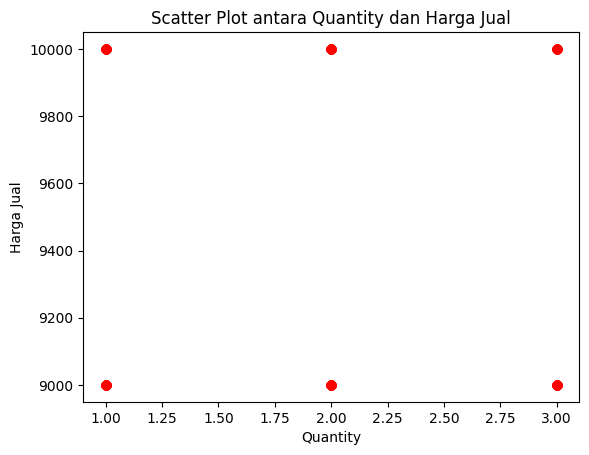

In [ ]:
plt.scatter(warmindo["quantity"], warmindo["harga_jual"], color="red")
plt.xlabel("Quantity")
plt.ylabel("Harga Jual")
plt.title("Scatter Plot antara Quantity dan Harga Jual")

plt.show()
